In [19]:
import torch
import torch.nn
import torchvision

from torch import nn
from torchvision import transforms
import os
import random

import matplotlib.pyplot as plt
print(f"torch version : {torch.__version__}")

torch version : 2.4.1


In [20]:
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

# Try to import the going_modular directory, download it from GitHub if it doesn't work
try:
    from pytorch_modules.pytorch_modules import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves
except:
    # Get the going_modular scripts
    print("[INFO] Couldn't find going_modular or helper_functions scripts... downloading them from GitHub.")
    !git clone https://github.com/DutchVandaline/Artificial_Intelligence.git
    !mv Artificial_Intelligence/pytorch_modules .
    !mv Artificial_Intelligence/helper_functions.py . # get the helper_functions.py script
    !rm -rf pytorch-deep-learning
    from pytorch_modules.pytorch_modules import data_setup, engine
    from helper_functions import download_data, set_seeds, plot_loss_curves

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
image_path = "C:\junha\Personal_Notebook\data"

In [5]:
# Count Image Data length
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its conents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directoreis and 0 images in 'C:\junha\Personal_Notebook\data'.
There are 2 directoreis and 0 images in 'C:\junha\Personal_Notebook\data\test'.
There are 0 directoreis and 397 images in 'C:\junha\Personal_Notebook\data\test\defect'.
There are 0 directoreis and 46 images in 'C:\junha\Personal_Notebook\data\test\normal'.
There are 2 directoreis and 0 images in 'C:\junha\Personal_Notebook\data\train'.
There are 0 directoreis and 1585 images in 'C:\junha\Personal_Notebook\data\train\defect'.
There are 0 directoreis and 182 images in 'C:\junha\Personal_Notebook\data\train\normal'.


In [6]:
# Cut train image's normal data into 221
from shutil import copyfile
from pathlib import Path

defect_dir = Path("C:/junha/Personal_Notebook/data/train/defect")
normal_dir = Path("C:/junha/Personal_Notebook/data/train/normal")

defect_images = os.listdir(defect_dir)

random.seed(42)  # 재현을 위해 시드 설정
selected_images = random.sample(defect_images, 182)

undersampling_train_dir = 'C:/junha/Personal_Notebook/undersampling_data/undersampling_train'
os.makedirs(undersampling_train_dir, exist_ok=True)

undersampling_train_defect_dir = os.path.join(undersampling_train_dir, 'defect')
os.makedirs(undersampling_train_defect_dir, exist_ok=True)

for image_name in selected_images:
    src_path = os.path.join(defect_dir, image_name)
    dst_path = os.path.join(undersampling_train_defect_dir, image_name)
    copyfile(src_path, dst_path)

undersampling_train_normal_dir = os.path.join(undersampling_train_dir, 'normal')
os.makedirs(undersampling_train_normal_dir, exist_ok=True)

normal_images = os.listdir(normal_dir)
for image_name in normal_images:
    src_path = os.path.join(normal_dir, image_name)
    dst_path = os.path.join(undersampling_train_normal_dir, image_name)
    copyfile(src_path, dst_path)
print("Undersampled data made")

Undersampled data made


In [7]:
# Cut train image's normal data into 221
from shutil import copyfile
from pathlib import Path

defect_dir = Path("C:/junha/Personal_Notebook/data/test/defect")
normal_dir = Path("C:/junha/Personal_Notebook/data/test/normal")

defect_images = os.listdir(defect_dir)

random.seed(42)  # 재현을 위해 시드 설정
selected_images = random.sample(defect_images, 46)

undersampling_test_dir = 'C:/junha/Personal_Notebook/undersampling_data/undersampling_test'
os.makedirs(undersampling_test_dir, exist_ok=True)

undersampling_test_defect_dir = os.path.join(undersampling_test_dir, 'defect')
os.makedirs(undersampling_test_defect_dir, exist_ok=True)

for image_name in selected_images:
    src_path = os.path.join(defect_dir, image_name)
    dst_path = os.path.join(undersampling_test_defect_dir, image_name)
    copyfile(src_path, dst_path)

undersampling_test_normal_dir = os.path.join(undersampling_test_dir, 'normal')
os.makedirs(undersampling_test_normal_dir, exist_ok=True)

normal_images = os.listdir(normal_dir)
for image_name in normal_images:
    src_path = os.path.join(normal_dir, image_name)
    dst_path = os.path.join(undersampling_test_normal_dir, image_name)
    copyfile(src_path, dst_path)
print("Undersampled data made")

Undersampled data made


In [8]:
undersampling_image_path = 'C:/junha/Personal_Notebook/undersampling_data'

In [9]:
# Count Image Data length
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its conents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directoreis and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(undersampling_image_path)

There are 2 directoreis and 0 images in 'C:/junha/Personal_Notebook/undersampling_data'.
There are 2 directoreis and 0 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_test'.
There are 0 directoreis and 46 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_test\defect'.
There are 0 directoreis and 46 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_test\normal'.
There are 2 directoreis and 0 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_train'.
There are 0 directoreis and 182 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_train\defect'.
There are 0 directoreis and 182 images in 'C:/junha/Personal_Notebook/undersampling_data\undersampling_train\normal'.


In [10]:
# Setup directory paths to train and test images
undersampling_train_dir = undersampling_image_path + "/undersampling_train"
undersampling_test_dir = undersampling_image_path + "/undersampling_test"
print(undersampling_train_dir, undersampling_test_dir)

C:/junha/Personal_Notebook/undersampling_data/undersampling_train C:/junha/Personal_Notebook/undersampling_data/undersampling_test


In [11]:
undersampling_pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

undersampling_pretrained_vit = torchvision.models.vit_b_16(weights=undersampling_pretrained_vit_weights).to(device)

for parameter in undersampling_pretrained_vit.parameters():
  parameter.requires_grad = False

set_seeds()
undersampling_pretrained_vit.heads = nn.Linear(in_features=768, out_features=2).to(device)

In [12]:
# Create an instance of Transformerblock
summary(model=undersampling_pretrained_vit,
        input_size = (1,3, 224,224),
        col_names = ["input_size", "output_size", "num_params", "trainable"],
        col_width = 16,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape      Output Shape     Param #          Trainable
VisionTransformer (VisionTransformer)                        [1, 3, 224, 224] [1, 2]           768              Partial
├─Conv2d (conv_proj)                                         [1, 3, 224, 224] [1, 768, 14, 14] (590,592)        False
├─Encoder (encoder)                                          [1, 197, 768]    [1, 197, 768]    151,296          False
│    └─Dropout (dropout)                                     [1, 197, 768]    [1, 197, 768]    --               --
│    └─Sequential (layers)                                   [1, 197, 768]    [1, 197, 768]    --               False
│    │    └─EncoderBlock (encoder_layer_0)                   [1, 197, 768]    [1, 197, 768]    (7,087,872)      False
│    │    └─EncoderBlock (encoder_layer_1)                   [1, 197, 768]    [1, 197, 768]    (7,087,872)      False
│    │    └─EncoderBlock (encoder_layer_2)           

In [13]:
# Get automatic transforms from pretrained ViT weights
vit_transforms = undersampling_pretrained_vit_weights.transforms()
vit_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [14]:
#Set up dataloaders
from pytorch_modules.pytorch_modules import data_setup
undersampling_train_dataloader_pretrained, undersampling_test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=undersampling_train_dir,
                                                                                                     test_dir=undersampling_test_dir,
                                                                                                     transform=vit_transforms,
                                                                                                     batch_size=32)


In [15]:
from pytorch_modules.pytorch_modules import engine

optimizer = torch.optim.Adam(params=undersampling_pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

set_seeds()
undersampling_pretrained_vit_results = engine.train(model=undersampling_pretrained_vit,
                                      train_dataloader=undersampling_train_dataloader_pretrained,
                                      test_dataloader=undersampling_test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6341 | train_acc: 0.6467 | test_loss: 0.5481 | test_acc: 0.7679
Epoch: 2 | train_loss: 0.4726 | train_acc: 0.8290 | test_loss: 0.4621 | test_acc: 0.8006
Epoch: 3 | train_loss: 0.3777 | train_acc: 0.8984 | test_loss: 0.3839 | test_acc: 0.8839
Epoch: 4 | train_loss: 0.3074 | train_acc: 0.9280 | test_loss: 0.3300 | test_acc: 0.9256
Epoch: 5 | train_loss: 0.2702 | train_acc: 0.9453 | test_loss: 0.2918 | test_acc: 0.9360
Epoch: 6 | train_loss: 0.2339 | train_acc: 0.9627 | test_loss: 0.2619 | test_acc: 0.9464
Epoch: 7 | train_loss: 0.2017 | train_acc: 0.9766 | test_loss: 0.2360 | test_acc: 0.9464
Epoch: 8 | train_loss: 0.1830 | train_acc: 0.9696 | test_loss: 0.2167 | test_acc: 0.9464
Epoch: 9 | train_loss: 0.1681 | train_acc: 0.9792 | test_loss: 0.1986 | test_acc: 0.9464
Epoch: 10 | train_loss: 0.1555 | train_acc: 0.9896 | test_loss: 0.1841 | test_acc: 0.9464


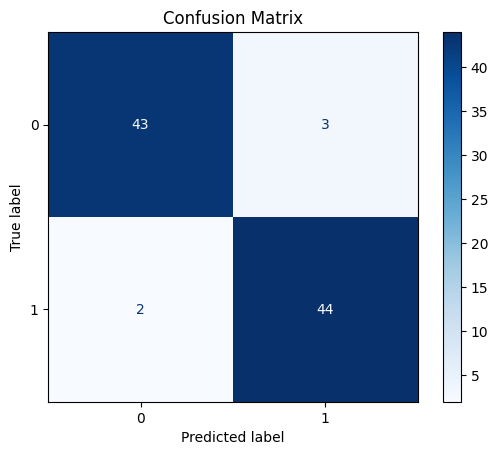

In [17]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming you have a test DataLoader (test_dataloader_pretrained) and the model (pretrained_vit)
# Ensure the model is in evaluation mode
undersampling_pretrained_vit.eval()

# Create lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Move model to the appropriate device (e.g., CPU or GPU)
undersampling_pretrained_vit.to(device)

# Disable gradient calculation for evaluation
with torch.no_grad():
    for data in undersampling_test_dataloader_pretrained:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = undersampling_pretrained_vit(inputs)
        _, preds = torch.max(outputs, 1)

        # Collect predictions and true labels
        predicted_labels.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
    

F1 Score (Micro): 0.9456521739130435
F1 Score (Macro): 0.9456457520973649
Precision (Micro): 0.9456521739130435
Precision (Macro): 0.9458628841607566
Recall (Micro): 0.9456521739130435
Recall (Macro): 0.9456521739130435


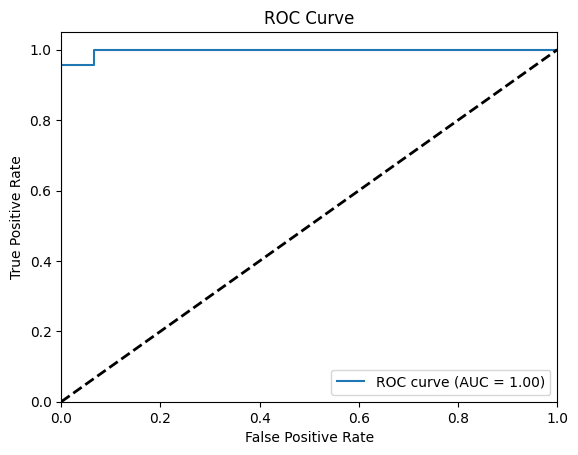

In [18]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Assuming you have a test DataLoader (test_dataloader_pretrained) and the model (pretrained_vit)
# Ensure the model is in evaluation mode
undersampling_pretrained_vit.eval()

# Create lists to store true and predicted labels
true_labels = []
predicted_labels = []
all_probabilities = []

# Move model to the appropriate device (e.g., CPU or GPU)
undersampling_pretrained_vit.to(device)

# Disable gradient calculation for evaluation
with torch.no_grad():
    for data in undersampling_test_dataloader_pretrained:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = undersampling_pretrained_vit(inputs)
        _, preds = torch.max(outputs, 1)

        # Collect predictions, true labels, and predicted probabilities
        predicted_labels.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        all_probabilities.extend(torch.softmax(outputs, dim=1).cpu().numpy())

# Calculate F1 score (micro and macro)
f1_micro = f1_score(true_labels, predicted_labels, average='micro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")

# Calculate Precision and Recall
precision_micro = precision_score(true_labels, predicted_labels, average='micro')
precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_micro = recall_score(true_labels, predicted_labels, average='micro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')

print(f"Precision (Micro): {precision_micro}")
print(f"Precision (Macro): {precision_macro}")
print(f"Recall (Micro): {recall_micro}")
print(f"Recall (Macro): {recall_macro}")

# Determine if it's binary or multi-class
num_classes = len(np.unique(true_labels))

if num_classes == 2:
    # Binary classification: Use only one ROC curve
    fpr, tpr, _ = roc_curve(true_labels, np.array(all_probabilities)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for binary classification
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
else:
    # Multi-class classification: ROC curve for each class
    true_labels_binarized = label_binarize(true_labels, classes=np.arange(num_classes))

    # Plot ROC curve for each class
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(true_labels_binarized[:, i], np.array(all_probabilities)[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()